## Exercise 2 : Clustering Method
In this exercise we will explore how each clustering algorithm discussed in the class works.

### Import Library

Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

### Load Dataset
The dataset that we will use is a **Property Dataset**. In this dataset there will be 11 features including: <br>
- Area Category,
- Luas Tanah (m2),
- Luas Bangunan (m2),
- Jumlah Kamar,
- Jumlah Kamar Mandi,
- Tingkat/Lantai,
- Harga Penawaran (dari Owner),
- Terjual/Belum,
- Arah Hadap Rumah,
- Posisi Rumah,
- Lebar Jalan Depan Rumah (ROW). <br>

You can get the dataset from **Elearn**

Load dataset

In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/cvinnn/Data-Mining/refs/heads/main/Week%209/property_dataset.csv")
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [3]:
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai
count,307.000000,307.000000,307.000000,306.000000,306.000000
mean,226.908795,266.579805,4.276873,3.339869,1.856209
std,202.149571,213.501196,1.646412,1.632311,0.512702
min,14.000000,14.000000,1.000000,1.000000,1.000000
25%,96.000000,120.000000,3.000000,2.000000,2.000000
50%,162.000000,200.000000,4.000000,3.000000,2.000000
75%,286.000000,332.500000,5.000000,4.000000,2.000000
max,1561.000000,1200.000000,13.000000,13.000000,4.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Nama Daerah                    307 non-null    object 
 2   Luas Tanah (m2)                307 non-null    float64
 3   Luas Bangunan (m2)             307 non-null    float64
 4   Jumlah Kamar                   307 non-null    float64
 5   Jumlah Kamar Mandi             306 non-null    float64
 6   Tingkat/Lantai                 306 non-null    float64
 7   Harga Penawaran (dari Owner)   307 non-null    object 
 8   Terjual/Belum                  307 non-null    object 
 9   Arah Hadap Rumah               225 non-null    object 
 10  Posisi Rumah                   192 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(5), object(7)
memory usage: 29.0+ KB


Data Preparation

1. Check if there are any missing values in the data.
2. Check the percentage of null values.
3. Perform label encoding.
4. Apply feature scaling to the data.

1.

In [5]:
missing_values = df.isnull().sum()
missing_values

Area Category                      1
Nama Daerah                        1
Luas Tanah (m2)                    1
Luas Bangunan (m2)                 1
Jumlah Kamar                       1
Jumlah Kamar Mandi                 2
Tingkat/Lantai                     2
Harga Penawaran (dari Owner)       1
Terjual/Belum                      1
Arah Hadap Rumah                  83
Posisi Rumah                     116
Lebar Jalan Depan Rumah (ROW)     42
dtype: int64

2.

In [6]:
checknull = df.isnull().mean() * 100
checknull

Area Category                     0.324675
Nama Daerah                       0.324675
Luas Tanah (m2)                   0.324675
Luas Bangunan (m2)                0.324675
Jumlah Kamar                      0.324675
Jumlah Kamar Mandi                0.649351
Tingkat/Lantai                    0.649351
Harga Penawaran (dari Owner)      0.324675
Terjual/Belum                     0.324675
Arah Hadap Rumah                 26.948052
Posisi Rumah                     37.662338
Lebar Jalan Depan Rumah (ROW)    13.636364
dtype: float64

Since there are too many nulls but not up to 50%, it’s better to fill them in using SimpleImputer with the strategy set to 'most_frequent'

In [7]:
from sklearn.impute import SimpleImputer
Simputer = SimpleImputer(strategy='most_frequent')
df[:] = Simputer.fit_transform(df)
df.head()


,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [8]:
df.isnull().sum()

Area Category                    0
Nama Daerah                      0
Luas Tanah (m2)                  0
Luas Bangunan (m2)               0
Jumlah Kamar                     0
Jumlah Kamar Mandi               0
Tingkat/Lantai                   0
Harga Penawaran (dari Owner)     0
Terjual/Belum                    0
Arah Hadap Rumah                 0
Posisi Rumah                     0
Lebar Jalan Depan Rumah (ROW)    0
dtype: int64

Drop the column 'Nama Daerah' because all the values are different.

In [9]:
df = df.drop(columns=['Nama Daerah'])

df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


3.

In [10]:
le = LabelEncoder()
for col in ['Area Category', 'Terjual/Belum', 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan Rumah (ROW)']:
  df[col] = le.fit_transform(df[col])
df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,240.0,300.0,4.0,3.0,2.0,3500000000,0,3,2,0
1,0,30.0,60.0,2.0,1.0,2.0,287799000,0,3,2,1
2,3,170.0,170.0,5.0,4.0,2.0,2699999999,0,1,0,0
3,2,187.0,250.0,5.0,5.0,2.0,3100000000,0,3,2,0
4,1,350.0,600.0,5.0,5.0,2.0,5000000000,0,0,2,0


To replace incorrect or invalid data in the column "Harga Penawaran (dari Owner)", do the following:

Replace empty values (" ") with "10500000000".

Replace values with commas like "10.500.000.000,00" with "10500000000".

In [11]:
df['Harga Penawaran (dari Owner)'].replace(" ", "10500000000", inplace=True)
df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].str.replace('.', '').str.replace(',', '').astype(object)

check the data type

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  308 non-null    int32  
 1   Luas Tanah (m2)                308 non-null    float64
 2   Luas Bangunan (m2)             308 non-null    float64
 3   Jumlah Kamar                   308 non-null    float64
 4   Jumlah Kamar Mandi             308 non-null    float64
 5   Tingkat/Lantai                 308 non-null    float64
 6   Harga Penawaran (dari Owner)   308 non-null    object 
 7   Terjual/Belum                  308 non-null    int32  
 8   Arah Hadap Rumah               308 non-null    int32  
 9   Posisi Rumah                   308 non-null    int32  
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int32  
dtypes: float64(5), int32(5), object(1)
memory usage: 20.6+ KB


Change the data types from:

- float to int
- object to int

In [13]:
float_columns = df.select_dtypes(include=['float64']).columns
for col in float_columns:
    df[col] = df[col].round().astype('Int64') 

int32_columns = df.select_dtypes(include=['int32']).columns
for col in int32_columns:
    df[col] = df[col].astype('Int64')

df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].astype('Int64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Area Category                  308 non-null    Int64
 1   Luas Tanah (m2)                308 non-null    Int64
 2   Luas Bangunan (m2)             308 non-null    Int64
 3   Jumlah Kamar                   308 non-null    Int64
 4   Jumlah Kamar Mandi             308 non-null    Int64
 5   Tingkat/Lantai                 308 non-null    Int64
 6   Harga Penawaran (dari Owner)   308 non-null    Int64
 7   Terjual/Belum                  308 non-null    Int64
 8   Arah Hadap Rumah               308 non-null    Int64
 9   Posisi Rumah                   308 non-null    Int64
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    Int64
dtypes: Int64(11)
memory usage: 29.9 KB


4.

In [15]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,240,300,4,3,2,3500000000,0,3,2,0
1,0,30,60,2,1,2,287799000,0,3,2,1
2,3,170,170,5,4,2,2699999999,0,1,0,0
3,2,187,250,5,5,2,3100000000,0,3,2,0
4,1,350,600,5,5,2,5000000000,0,0,2,0


## K-Means Clustering

Using the elbow method, determine the number of clusters to be formed.

Use the elbow range range(1, 11)

In [16]:

sse=[]

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

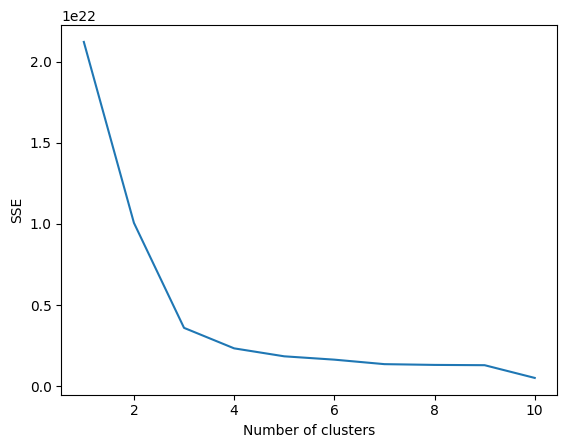

In [17]:
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [18]:
# using kneelocator to find the elbow/knee
from kneed import KneeLocator
kneedle = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
best_k = kneedle.elbow
print("The best k for you model is", best_k)

The best k for you model is 3


Train the K-Means model on the dataset with the number of clusters you have determined.

In [19]:
kmeans1 = KMeans(n_clusters=best_k,init="random").fit(scaled_data)
sse.append(kmeans.inertia_)
df_kmeans = kmeans1.predict(scaled_data)
df["Cluster"]= df_kmeans
df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster
0,3,240,300,4,3,2,3500000000,0,3,2,0,1
1,0,30,60,2,1,2,287799000,0,3,2,1,0
2,3,170,170,5,4,2,2699999999,0,1,0,0,1
3,2,187,250,5,5,2,3100000000,0,3,2,0,1
4,1,350,600,5,5,2,5000000000,0,0,2,0,1


Display the cluster summary in the form of a dataframe:

1. For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).
2. For continuous columns: mean.
3. Cluster results: count.

In [20]:
df.groupby("Cluster")[["Area Category", "Terjual/Belum", "Arah Hadap Rumah", "Posisi Rumah", "Lebar Jalan Depan Rumah (ROW)"]].agg(lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else None)


,Area Category,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
Cluster,,,,,
0,3,0,3,2,0
1,1,0,3,2,0
2,1,0,3,2,2


In [21]:
df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster
0,3,240,300,4,3,2,3500000000,0,3,2,0,1
1,0,30,60,2,1,2,287799000,0,3,2,1,0
2,3,170,170,5,4,2,2699999999,0,1,0,0,1
3,2,187,250,5,5,2,3100000000,0,3,2,0,1
4,1,350,600,5,5,2,5000000000,0,0,2,0,1


In [22]:
df.groupby("Cluster")[["Luas Tanah (m2)", "Luas Bangunan (m2)", "Jumlah Kamar", "Jumlah Kamar Mandi", "Tingkat/Lantai ", "Harga Penawaran (dari Owner)"]].agg(pd.Series.mean)


,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
Cluster,,,,,,
0,108.601695,111.898305,2.796610,1.923729,1.593220,1.523737e+09
1,211.324324,274.770270,4.858108,3.898649,2.027027,4.014384e+09
2,614.523810,673.095238,6.380952,5.333333,1.952381,1.834464e+10


In [23]:
df.groupby("Cluster")["Cluster"].agg(pd.Series.count)

Cluster
0    118
1    148
2     42
Name: Cluster, dtype: int64

## Hierarchical Clustering
Hierarchical clustering uses the agglomerative method.

Plot the dendrogram to help determine the number of clusters, using the 'max' method.

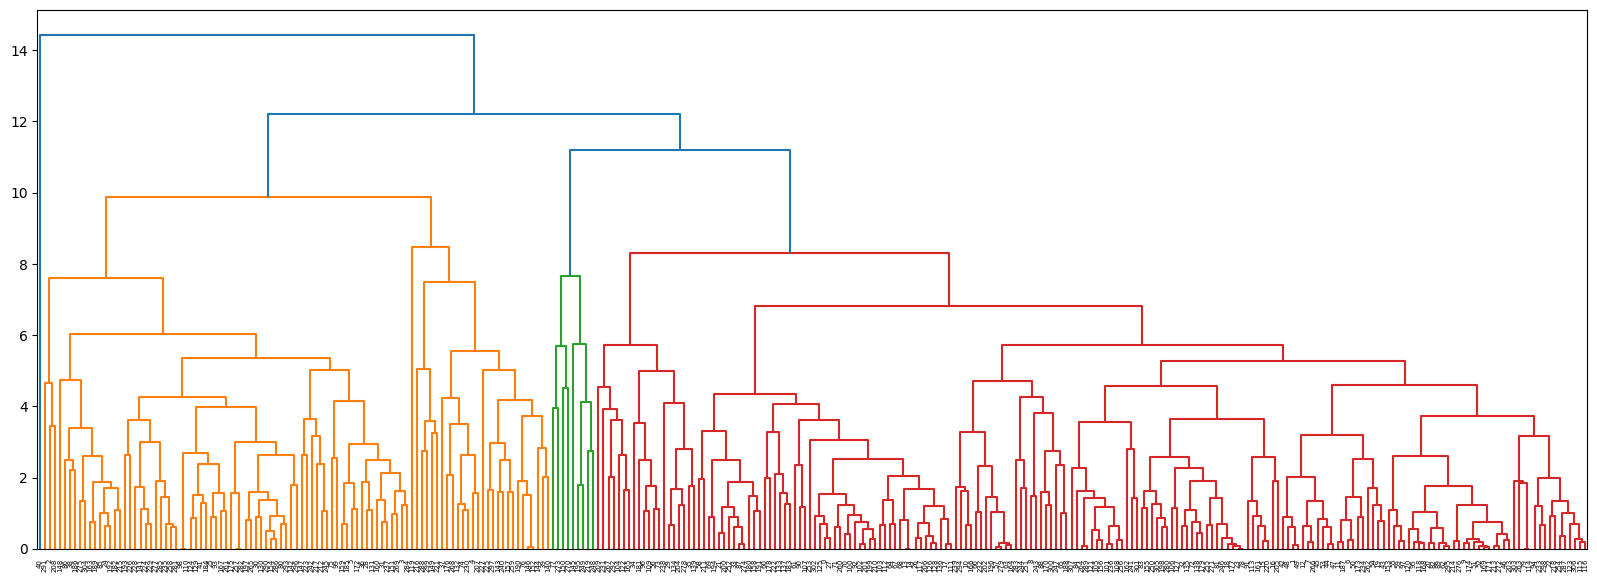

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(20,7))
linkage_data = linkage(scaled_data, method='complete')
dendrogram(linkage_data)
plt.show()

Perform hierarchical clustering with the Euclidean distance metric and set the number of clusters equal to the number of clusters from the K-Means model.

In [25]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=4, metric='euclidean')
label = model.fit_predict(scaled_data)
print(label)


[2 0 1 2 1 1 0 0 0 2 2 0 0 2 2 2 2 0 0 0 2 0 2 0 2 0 0 2 1 0 0 1 0 0 0 0 1
 1 1 1 3 0 0 0 0 0 2 0 0 0 0 2 2 0 0 2 0 2 0 2 0 2 2 2 2 0 2 2 2 0 2 2 0 0
 0 1 1 3 0 2 0 0 2 0 0 2 1 0 0 2 2 2 2 0 2 2 0 2 0 0 2 0 2 2 0 0 0 2 0 0 0
 0 2 2 2 2 2 0 2 1 2 0 0 2 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 3 1 3
 1 1 3 1 1 2 0 0 0 1 0 1 1 2 0 2 2 0 2 0 2 2 0 2 1 0 2 0 1 0 0 0 0 0 2 0 0
 1 1 0 0 2 1 0 2 0 0 3 2 0 0 2 0 2 2 2 0 2 0 1 1 0 2 0 1 2 2 2 1 1 2 3 2 1
 0 3 0 1 0 3 0 0 0 2 2 2 0 0 0 1 0 2 1 0 1 0 0 1 0 0 3 3 0 0 0 0 2 0 0 0 0
 1 2 0 0 2 0 0 0 0 1 1 3 0 2 1 0 2 2 0 0 2 0 0 0 0 2 0 0 2 1 0 0 1 0 0 2 2
 0 1 2 1 0 0 2 2 2 0 2 0]


Display the cluster summary in the form of a dataframe with the same criteria as the previous summary

In [26]:
agglomerative_model = AgglomerativeClustering(n_clusters=best_k, metric='euclidean', linkage='ward')
df['Agglomerative_Cluster'] = agglomerative_model.fit_predict(df)
df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster,Agglomerative_Cluster
0,3,240,300,4,3,2,3500000000,0,3,2,0,1,2
1,0,30,60,2,1,2,287799000,0,3,2,1,0,2
2,3,170,170,5,4,2,2699999999,0,1,0,0,1,2
3,2,187,250,5,5,2,3100000000,0,3,2,0,1,2
4,1,350,600,5,5,2,5000000000,0,0,2,0,1,2


In [27]:
agglomerative_model = AgglomerativeClustering(n_clusters=best_k, metric='euclidean', linkage='ward')
df['Agglomerative_Cluster'] = agglomerative_model.fit_predict(df)
df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster,Agglomerative_Cluster
0,3,240,300,4,3,2,3500000000,0,3,2,0,1,2
1,0,30,60,2,1,2,287799000,0,3,2,1,0,2
2,3,170,170,5,4,2,2699999999,0,1,0,0,1,2
3,2,187,250,5,5,2,3100000000,0,3,2,0,1,2
4,1,350,600,5,5,2,5000000000,0,0,2,0,1,2


In [28]:
df["Agglo"] = label  # Ensure `label` is a valid series or list

# Group by 'Cluster' and aggregate with mode
result = df.groupby("Cluster")[[
    "Area Category",
    "Terjual/Belum",
    "Arah Hadap Rumah",
    "Posisi Rumah",
    "Lebar Jalan Depan Rumah (ROW)"
]].agg(lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else None)

# Display the result
result


,Area Category,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
Cluster,,,,,
0,3,0,3,2,0
1,1,0,3,2,0
2,1,0,3,2,2


In [29]:
# Group by 'Agglo' and calculate the mean for the selected columns
result = df.groupby("Agglo")[
    ["Luas Tanah (m2)", "Luas Bangunan (m2)", "Jumlah Kamar", "Jumlah Kamar Mandi", "Tingkat/Lantai ", "Harga Penawaran (dari Owner)"]
].mean()

# Display the result
result


,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
Agglo,,,,,,
0,170.124183,211.581699,4.117647,3.176471,1.908497,3034322505.941176
1,435.530612,554.469388,6.081633,5.142857,2.081633,10395408163.204082
2,126.404255,145.734043,3.329787,2.5,1.680851,1924239361.702128
3,887.416667,741.666667,6.333333,4.583333,1.5,32491665750.0


In [30]:
df.groupby("Agglo")["Agglo"].agg(pd.Series.count)

Agglo
0    153
1     49
2     94
3     12
Name: Agglo, dtype: int64

**Hierarchical Visualization**

Single Linkage

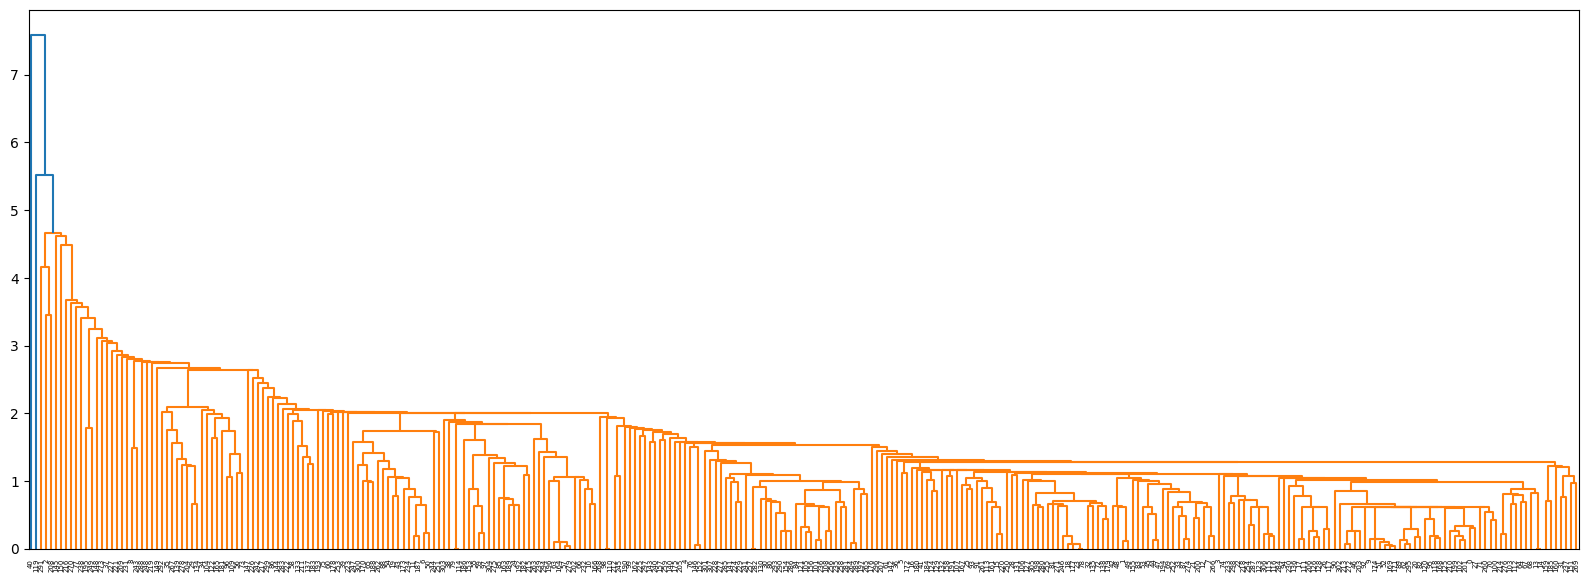

In [31]:
plt.figure(figsize=(20,7))
linkage_data = linkage(scaled_data, method='single')
dendrogram(linkage_data)
plt.show()

complete linkage

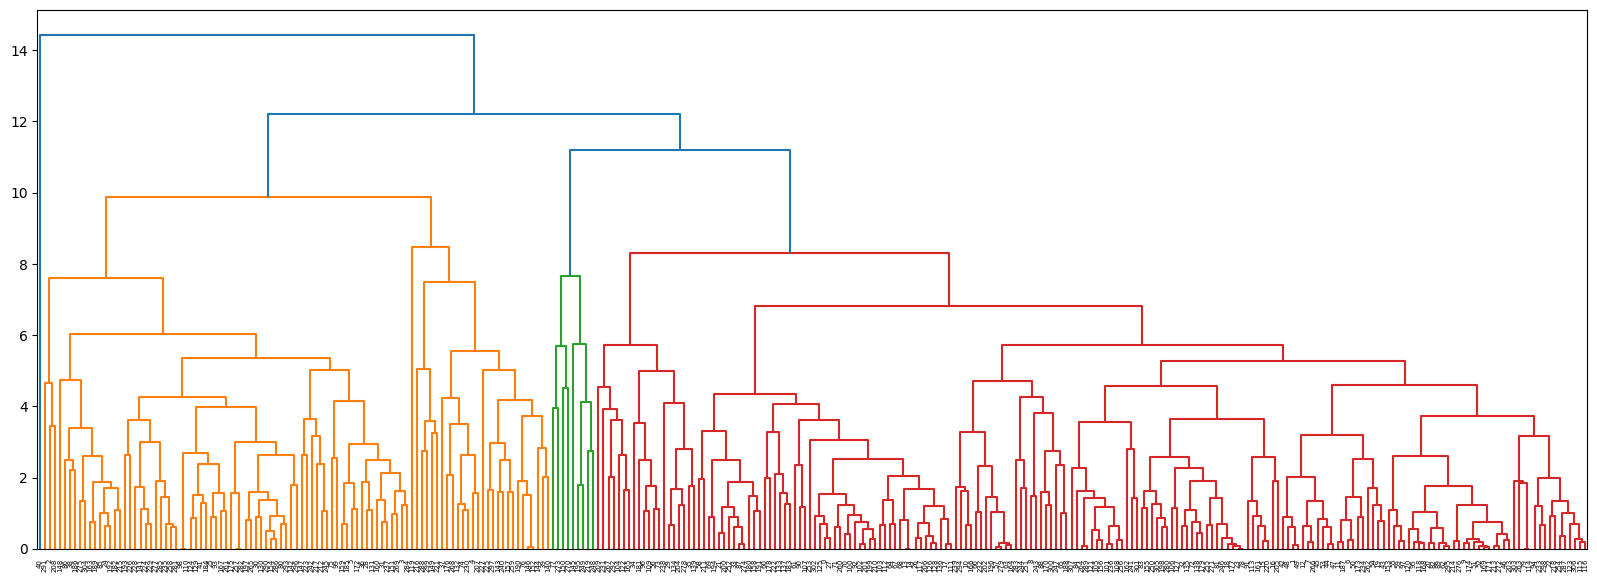

In [32]:

plt.figure(figsize=(20,7))
linkage_data = linkage(scaled_data, method='complete')  # Change 'single' to 'complete'
dendrogram(linkage_data)
plt.show()

average linkage

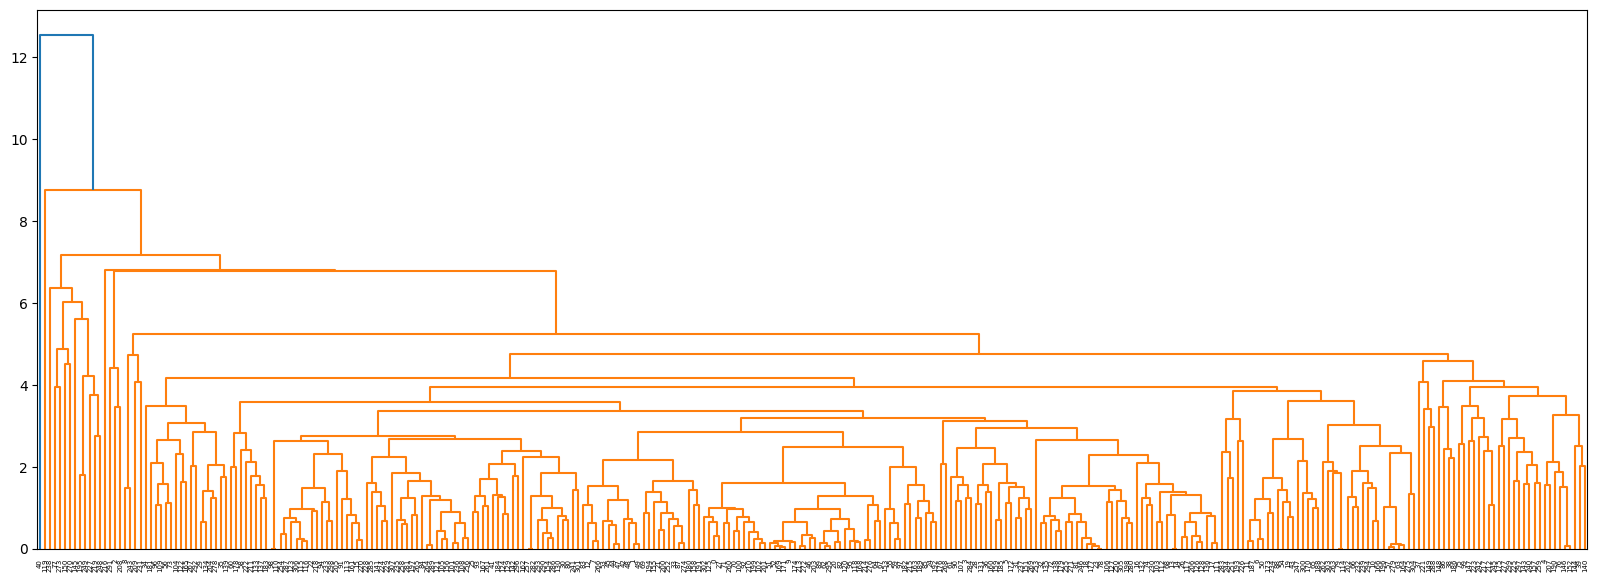

In [33]:
plt.figure(figsize=(20,7))
linkage_data = linkage(scaled_data, method='average')
dendrogram(linkage_data)
plt.show()

ward linkage

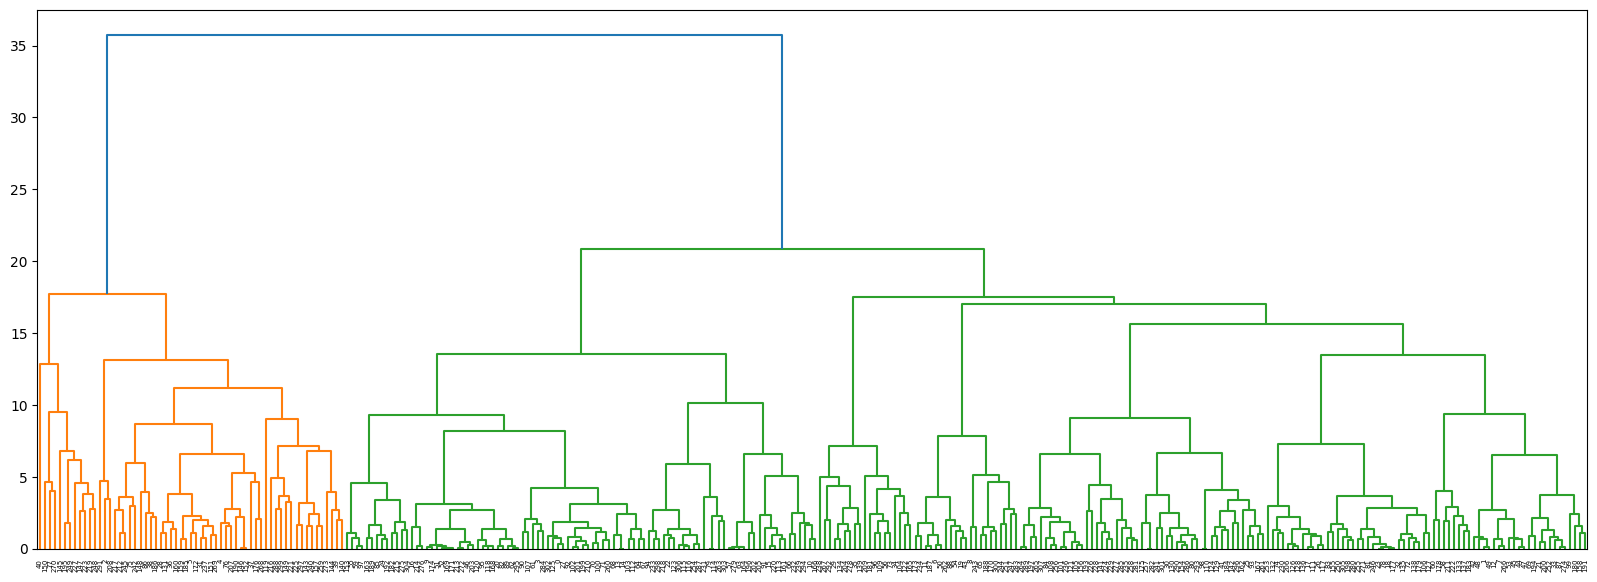

In [34]:
plt.figure(figsize=(20,7))
linkage_data = linkage(scaled_data, method='ward')
dendrogram(linkage_data)
plt.show()